# **Advanced Churn Data**

In [1]:
import pandas as pd
df=pd.read_csv("/content/Customer_Data.csv")

In [56]:
df.head()

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,19877-DEL,Male,35,No,Delhi,7,27,None,Yes,No,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,Stayed,Stayed
1,58353-MAH,Female,45,Yes,Maharashtra,14,13,None,Yes,Yes,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,Stayed,Stayed
2,25063-WES,Male,51,No,West Bengal,4,35,Deal 5,Yes,No,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,59787-KAR,Male,79,No,Karnataka,3,21,Deal 4,Yes,No,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,28544-TAM,Female,80,No,Tamil Nadu,3,8,None,Yes,No,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6418 entries, 0 to 6417
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Gender                       6418 non-null   object 
 1   Age                          6418 non-null   int64  
 2   Married                      6418 non-null   object 
 3   State                        6418 non-null   object 
 4   Number_of_Referrals          6418 non-null   int64  
 5   Tenure_in_Months             6418 non-null   int64  
 6   Value_Deal                   6418 non-null   object 
 7   Phone_Service                6418 non-null   object 
 8   Multiple_Lines               6418 non-null   object 
 9   Internet_Service             6418 non-null   object 
 10  Internet_Type                6418 non-null   object 
 11  Online_Security              6418 non-null   object 
 12  Online_Backup                6418 non-null   object 
 13  Device_Protection_

In [55]:
df.describe()

,Age,Number_of_Referrals,Tenure_in_Months,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue
count,6418.000000,6418.000000,6418.000000,6418.000000,6418.000000,6418.000000,6418.000000,6418.000000,6418.000000
mean,47.070739,7.427859,17.342786,63.652867,2280.374858,1.924944,6.718604,748.703468,3033.871987
std,16.703633,4.621519,10.576391,31.188823,2268.049985,7.849083,24.722533,847.672844,2866.505426
min,18.000000,0.000000,1.000000,-10.000000,18.800000,0.000000,0.000000,0.000000,21.360000
25%,33.000000,3.000000,8.000000,30.562500,395.725000,0.000000,0.000000,70.805000,603.742500
50%,46.000000,7.000000,16.000000,70.100000,1396.125000,0.000000,0.000000,407.475000,2108.635000
75%,60.000000,11.000000,27.000000,89.750000,3783.600000,0.000000,0.000000,1182.917500,4801.537500
max,85.000000,15.000000,36.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000


In [2]:
impute_cols=['Internet_Type','Online_Security','Online_Backup','Device_Protection_Plan','Premium_Support','Streaming_TV','Streaming_Movies','Streaming_Music','Unlimited_Data']
no_internet_mask = df['Internet_Service'] == 'No'
df.loc[no_internet_mask, impute_cols] = df.loc[no_internet_mask, impute_cols].fillna('No internet service')


In [3]:
df['Churn_Category']=df['Churn_Category'].fillna('Stayed')
df['Churn_Reason']=df['Churn_Reason'].fillna('Stayed')


In [4]:
df['Value_Deal']=df['Value_Deal'].fillna('None')

In [5]:
df.loc[df['Phone_Service']=='No','Multiple_Lines']=df.loc[df['Phone_Service']=='No','Multiple_Lines'].fillna('No phone service')

In [6]:
for col in df.columns:
    print(f'{col}: {df[col].unique()}')

Customer_ID: ['19877-DEL' '58353-MAH' '25063-WES' ... '78682-KER' '17816-ODI'
 '34476-TAM']
Gender: ['Male' 'Female']
Age: [35 45 51 79 80 24 66 63 41 48 26 56 36 38 53 47 67 74 64 78 29 18 31 34
 44 69 49 22 46 30 32 52 61 25 54 73 28 68 65 21 58 27 42 20 72 50 59 57
 81 76 55 77 39 23 83 19 70 40 60 33 43 62 71 82 75 37 84 85]
Married: ['No' 'Yes']
State: ['Delhi' 'Maharashtra' 'West Bengal' 'Karnataka' 'Tamil Nadu' 'Telangana'
 'Gujarat' 'Uttar Pradesh' 'Rajasthan' 'Bihar' 'Andhra Pradesh'
 'Madhya Pradesh' 'Chhattisgarh' 'Punjab' 'Jharkhand' 'Haryana'
 'Jammu & Kashmir' 'Assam' 'Uttarakhand' 'Odisha' 'Kerala' 'Puducherry']
Number_of_Referrals: [ 7 14  4  3  9 12  0  6 15  8  1  5 13  2 10 11]
Tenure_in_Months: [27 13 35 21  8  2 23 24 10  1 22 26  6 19  4 30 33 12 20  7 18  3 16 31
 25 14 28 29 34 36 32 17  5 15 11  9]
Value_Deal: ['None' 'Deal 5' 'Deal 4' 'Deal 1' 'Deal 2' 'Deal 3']
Phone_Service: ['Yes' 'No']
Multiple_Lines: ['No' 'Yes' 'No phone service']
Internet_Service: ['Yes

In [ ]:
df.isnull().sum()

,0
Customer_ID,0
Gender,0
Age,0
Married,0
State,0
Number_of_Referrals,0
Tenure_in_Months,0
Value_Deal,0
Phone_Service,0
Multiple_Lines,0


In [7]:
df.shape

(6418, 32)

In [138]:
j_df.head()

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
17,93520-GUJ,Female,67,No,Gujarat,13,19,Deal 5,Yes,Yes,...,Bank Withdrawal,72.10,72.1,0.0,0,7.77,79.87,Joined,Stayed,Stayed
23,57256-BIH,Female,18,No,Bihar,9,7,None,Yes,No,...,Credit Card,19.85,57.2,0.0,0,9.36,66.56,Joined,Stayed,Stayed
48,72357-MAD,Female,53,No,Madhya Pradesh,14,12,Deal 5,Yes,No,...,Credit Card,44.30,44.3,0.0,0,42.95,87.25,Joined,Stayed,Stayed
98,66612-KAR,Female,58,Yes,Karnataka,11,18,None,Yes,No,...,Credit Card,19.95,58.0,0.0,0,8.07,66.07,Joined,Stayed,Stayed
104,22119-WES,Male,31,Yes,West Bengal,5,5,None,Yes,No,...,Credit Card,20.05,33.7,0.0,0,3.62,37.32,Joined,Stayed,Stayed


In [ ]:
df.to_csv('Cleaned_Customer_Data.csv')

In [89]:
df.shape

(6007, 32)

In [8]:
drop_cols=['Customer_ID','Churn_Reason','Churn_Category','Total_Revenue']
for col in drop_cols:
   df.drop(col, axis=1, inplace=True)

In [9]:
label_cols=['Gender','Customer_Status','Phone_Service','Internet_Service','Paperless_Billing','Married']
for col in label_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0, 'Male': 1, 'Female': 0,'Churned': 1 ,'Stayed': 0,'Joined':2})

In [10]:
df_encoded = pd.get_dummies(df, columns=['State','Multiple_Lines', 'Contract', 'Payment_Method',
                                         'Value_Deal','Internet_Type','Online_Security','Online_Backup','Device_Protection_Plan',
                                         'Premium_Support','Streaming_TV','Streaming_Movies','Streaming_Music','Unlimited_Data'
])

In [12]:
from sklearn.preprocessing import StandardScaler
scale_cols=['Age','Number_of_Referrals','Tenure_in_Months','Monthly_Charge','Total_Charges','Total_Refunds','Total_Extra_Data_Charges','Total_Long_Distance_Charges']
scaler = StandardScaler()
df_encoded[scale_cols] = scaler.fit_transform(df_encoded[scale_cols])

In [14]:
df_encoded['Customer_Status'].unique()

array([0, 1, 2])

In [155]:
j_df_encoded=df_encoded[df_encoded['Customer_Status'].isin([2])]

In [157]:
j_df_encoded.shape

(411, 79)

In [15]:
df_encoded.drop(df_encoded[df_encoded['Customer_Status'].isin([2])].index, inplace=True)

In [16]:
X=df_encoded.drop('Customer_Status', axis=1)
y=df_encoded['Customer_Status']

In [17]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Before SMOTE:", y.value_counts())
print("After SMOTE:", y_resampled.value_counts())

# Step 3: Split into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled
)

Before SMOTE: Customer_Status
0    4275
1    1732
Name: count, dtype: int64
After SMOTE: Customer_Status
0    4275
1    4275
Name: count, dtype: int64


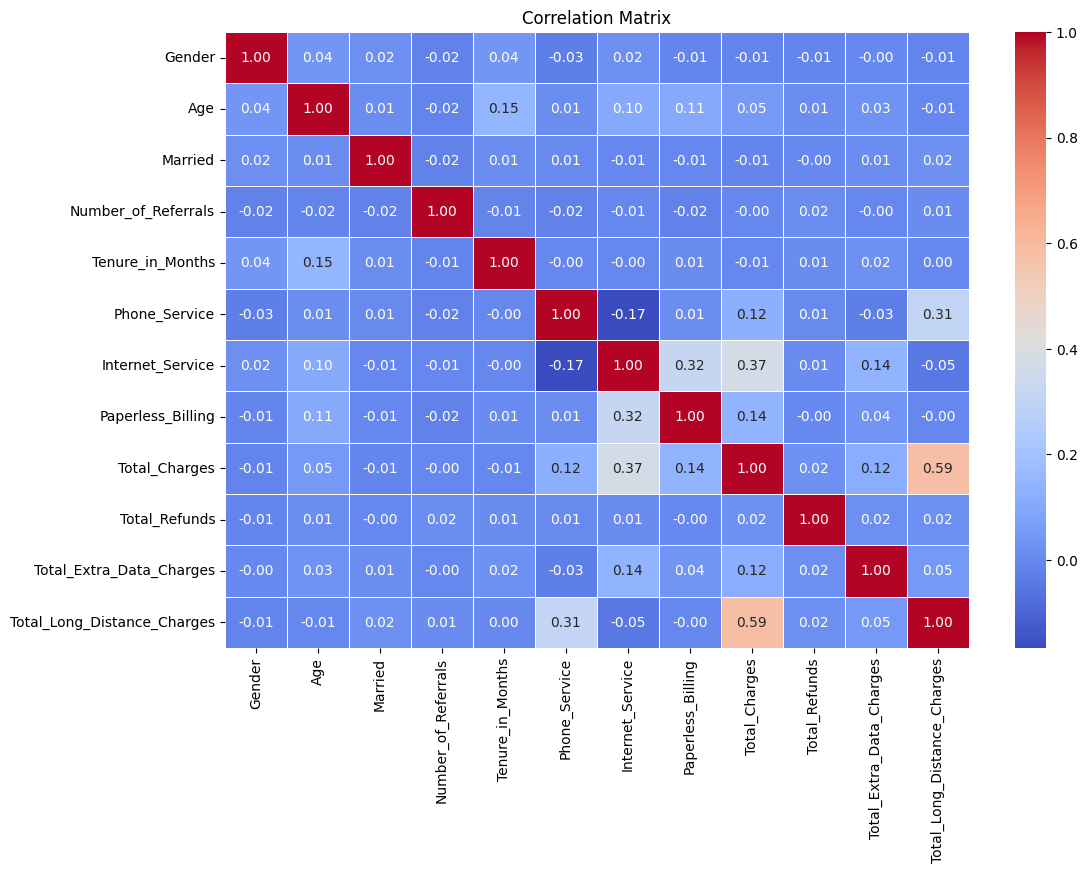

                               Gender       Age   Married  \
Gender                       1.000000  0.041218  0.018715   
Age                          0.041218  1.000000  0.012264   
Married                      0.018715  0.012264  1.000000   
Number_of_Referrals         -0.019530 -0.016397 -0.019757   
Tenure_in_Months             0.039336  0.149522  0.012082   
Phone_Service               -0.029145  0.014800  0.005778   
Internet_Service             0.016785  0.104603 -0.005152   
Paperless_Billing           -0.007346  0.105369 -0.006723   
Total_Charges               -0.012225  0.047938 -0.009053   
Total_Refunds               -0.010484  0.014267 -0.001286   
Total_Extra_Data_Charges    -0.001896  0.026735  0.012184   
Total_Long_Distance_Charges -0.013075 -0.006191  0.020650   

                             Number_of_Referrals  Tenure_in_Months  \
Gender                                 -0.019530          0.039336   
Age                                    -0.016397          0.149522

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure you're using numeric features
corr_matrix = X.select_dtypes(include=['int64', 'float64']).corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()
print(corr_matrix)

In [19]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 5.7 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:14:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2993, number of negative: 2992
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006498 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1632
[LightGBM] [Info] Number of data points in the train set: 5985, number of used features: 77
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500084 -> initscore=0.000334
[LightGBM] [Info] Start training from score 0.000334
🔍 Model Performance:
                     Model  Accuracy  ROC AUC
10                CatBoost    0.8920   0.9616
3            Random Forest    0.8916   0.9588
9                 LightGBM    0.8862   0.9579
8                  XGBoost    0.8885   0.9577
6        Gradient Boosting    0.8799   0.9531
0      Logistic Regression    0.8713   0.9489
4   Support Vector Machi

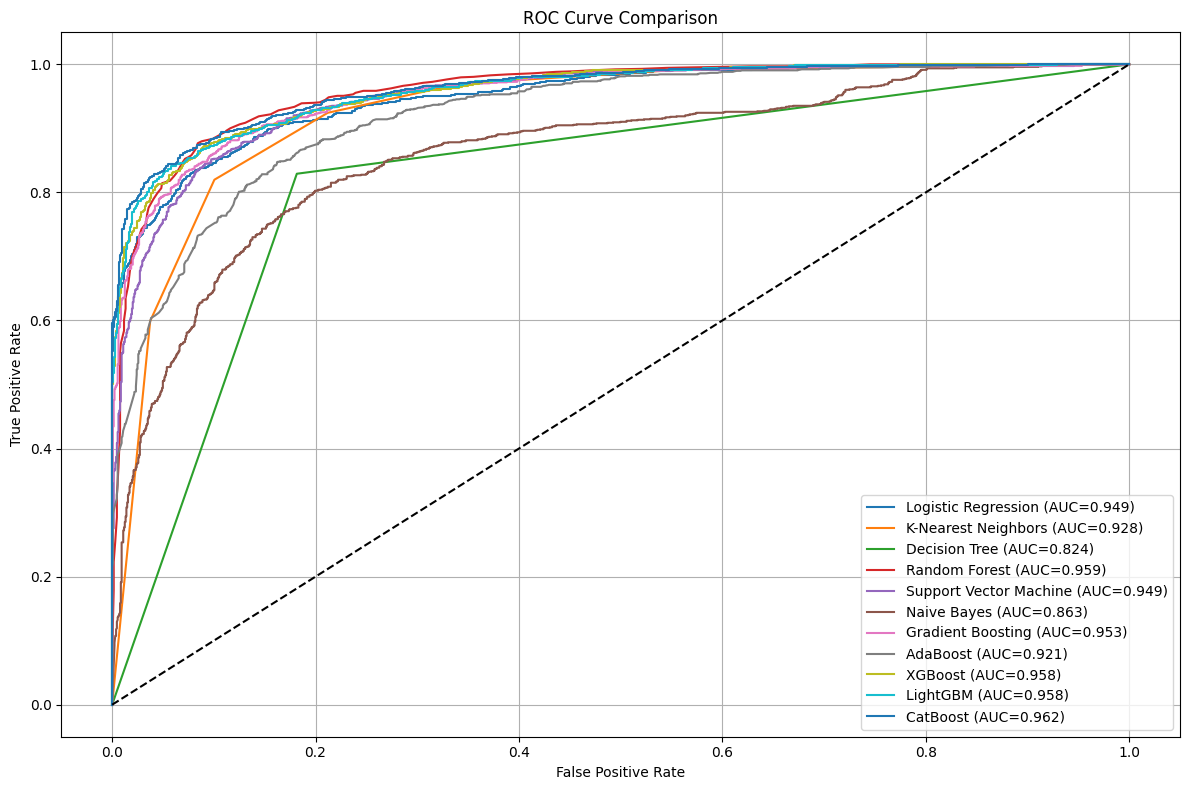

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Replace with your own processed data
# X_train, X_test, y_train, y_test should already be defined
# If not, do: X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 🔁 Define all models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Machine": SVC(probability=True),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "LightGBM": LGBMClassifier(random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42)
}

results = []
roc_data = {}

# 🔁 Train & Evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1]

    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)
    fpr, tpr, _ = roc_curve(y_test, y_proba)

    results.append({
        'Model': name,
        'Accuracy': round(acc, 4),
        'ROC AUC': round(auc, 4)
    })
    roc_data[name] = (fpr, tpr)

# 📊 Results Table
results_df = pd.DataFrame(results).sort_values(by='ROC AUC', ascending=False)
print("🔍 Model Performance:")
print(results_df)

# 📈 Plot ROC Curves
plt.figure(figsize=(12, 8))
for name, (fpr, tpr) in roc_data.items():
    plt.plot(fpr, tpr, label=f"{name} (AUC={roc_auc_score(y_test, models[name].predict_proba(X_test)[:,1]):.3f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [77]:
results_df.to_csv("model_comparison_metrics.csv", index=False)

In [158]:
j_df_encoded.head()

,Gender,Age,Married,Number_of_Referrals,Tenure_in_Months,Phone_Service,Internet_Service,Paperless_Billing,Monthly_Charge,Total_Charges,...,Streaming_TV_Yes,Streaming_Movies_No,Streaming_Movies_No internet service,Streaming_Movies_Yes,Streaming_Music_No,Streaming_Music_No internet service,Streaming_Music_Yes,Unlimited_Data_No,Unlimited_Data_No internet service,Unlimited_Data_Yes
17,0,1.193202,0,1.205789,0.156702,1,1,1,0.270860,-0.973721,...,False,True,False,False,True,False,False,False,False,True
23,0,-1.740520,0,0.340205,-0.977989,1,0,0,-1.404551,-0.980291,...,False,False,True,False,False,True,False,False,True,False
48,0,0.354996,0,1.422185,-0.505201,1,1,1,-0.620555,-0.985979,...,False,True,False,False,True,False,False,False,False,True
98,0,0.654355,1,0.772997,0.062145,1,0,0,-1.401344,-0.979938,...,False,False,True,False,False,True,False,False,True,False
104,1,-0.962185,1,-0.525379,-1.167104,1,0,0,-1.398138,-0.990653,...,False,False,True,False,False,True,False,False,True,False


In [160]:
j_df_encoded.drop('Customer_Status', axis=1, inplace=True)

/tmp/ipython-input-160-77202988.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  j_df_encoded.drop('Customer_Status', axis=1, inplace=True)


In [159]:
j_df_encoded.columns

Index(['Gender', 'Age', 'Married', 'Number_of_Referrals', 'Tenure_in_Months',
       'Phone_Service', 'Internet_Service', 'Paperless_Billing',
       'Monthly_Charge', 'Total_Charges', 'Total_Refunds',
       'Total_Extra_Data_Charges', 'Total_Long_Distance_Charges',
       'Customer_Status', 'State_Andhra Pradesh', 'State_Assam', 'State_Bihar',
       'State_Chhattisgarh', 'State_Delhi', 'State_Gujarat', 'State_Haryana',
       'State_Jammu & Kashmir', 'State_Jharkhand', 'State_Karnataka',
       'State_Kerala', 'State_Madhya Pradesh', 'State_Maharashtra',
       'State_Odisha', 'State_Puducherry', 'State_Punjab', 'State_Rajasthan',
       'State_Tamil Nadu', 'State_Telangana', 'State_Uttar Pradesh',
       'State_Uttarakhand', 'State_West Bengal', 'Multiple_Lines_No',
       'Multiple_Lines_No phone service', 'Multiple_Lines_Yes',
       'Contract_Month-to-Month', 'Contract_One Year', 'Contract_Two Year',
       'Payment_Method_Bank Withdrawal', 'Payment_Method_Credit Card',
       '

In [161]:
best_model = models["CatBoost"]
j_df["predicted_churn"] = best_model.predict(j_df_encoded)
j_df["churn_probability"] = best_model.predict_proba(j_df_encoded)[:, 1]

In [166]:
j_df.head()

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason,predicted_churn,churn_probability
17,93520-GUJ,Female,67,No,Gujarat,13,19,Deal 5,Yes,Yes,...,72.1,0.0,0,7.77,79.87,Joined,Joined,Joined,0,0.100103
23,57256-BIH,Female,18,No,Bihar,9,7,None,Yes,No,...,57.2,0.0,0,9.36,66.56,Joined,Joined,Joined,0,0.109924
48,72357-MAD,Female,53,No,Madhya Pradesh,14,12,Deal 5,Yes,No,...,44.3,0.0,0,42.95,87.25,Joined,Joined,Joined,1,0.716759
98,66612-KAR,Female,58,Yes,Karnataka,11,18,None,Yes,No,...,58.0,0.0,0,8.07,66.07,Joined,Joined,Joined,0,0.157373
104,22119-WES,Male,31,Yes,West Bengal,5,5,None,Yes,No,...,33.7,0.0,0,3.62,37.32,Joined,Joined,Joined,0,0.197319


In [167]:
j_df.to_csv("churn_predictions.csv", index=False)

In [168]:
import shap
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(j_df_encoded)
shap_df = pd.DataFrame(shap_values, columns=j_df_encoded.columns)
shap_df.to_csv("shap_catboost.csv", index=False)

In [169]:
# Refit Logistic Regression to ensure we're referring to the same model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Get feature names and corresponding coefficients
coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': logreg.coef_[0]
})

# Sort by absolute importance
coefficients['Abs_Coefficient'] = coefficients['Coefficient'].abs()
coefficients_sorted = coefficients.sort_values(by='Abs_Coefficient', ascending=False)

# Display top weights
print(coefficients_sorted[['Feature', 'Coefficient']])
coefficients_sorted.to_csv("logreg_feature_weights.csv", index=False)


                        Feature  Coefficient
38      Contract_Month-to-Month     3.137318
20        State_Jammu & Kashmir     2.841242
43  Payment_Method_Mailed Check     2.685392
14                  State_Assam     2.527230
44            Value_Deal_Deal 1     2.519915
..                          ...          ...
10                Total_Refunds    -0.152476
12  Total_Long_Distance_Charges    -0.147997
3           Number_of_Referrals     0.052342
4              Tenure_in_Months     0.023530
11     Total_Extra_Data_Charges     0.017101

[78 rows x 2 columns]
